In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import random
from datetime import datetime 
import geopandas as gpd

In [2]:
floats_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/profileData.csv')
sat_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/satData.csv')
merged_df = sat_df.merge(floats_df, on=['float', "cycleNumber", "date"], how='inner')

In [3]:

binned_float_df = merged_df.copy()
print(binned_float_df.shape)


(37469410, 20)


In [31]:
month_seasons_dict = {
    1: [1, 3],
    2: [1, 3],
    3: [2, 4],
    4: [2, 4],
    5: [2, 4],
    6: [3, 1],
    7: [3, 1],
    8: [3, 1],
    9: [4, 2],
    10: [4, 2],
    11: [4,2],
    12: [1, 3],
}

seasons_dict = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

# need a way to identify seasonality 
for i in binned_float_df.index:
    string_date = binned_float_df.loc[i, "date"]
    date = datetime.strptime(string_date, '%Y-%m-%d %H:%M:%S')
    month = date.month
    lat = binned_float_df.loc[i, 'latitude']
    seasons = month_seasons_dict.get(month)
    # if in southern hemisphere:
    if lat < 0: 
        season = seasons[1]
    else: 
        season = seasons[0]
    binned_float_df.at[i, "seasonality"] = season

    if i%100_000 == 0: print(i/100_000)


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0


In [3]:
binned_float_df.to_csv('floatSeasonality.csv')

NameError: name 'binned_float_df' is not defined

In [278]:
binned_float_df = pd.read_csv('../EDA/floatSeasonality.csv')

In [279]:
num_bins = 100
labels = list(range(1,num_bins+1))
bins = list(np.arange(0, 1010, 10))
# print("Labels: ", labels)
# print("Bins: ", bins)
binned_float_df['depth_bin'] = pd.cut(binned_float_df['PRES'], bins=bins, labels=labels)

In [280]:
cached_data = binned_float_df
cached_data

,Unnamed: 0,float,cycleNumber,date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,...,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED,PRES,PSAL,TEMP,BBP700,CHLA,seasonality,depth_bin
0,0,1902303,1,2021-05-06 02:03:16,49.236000,-14.742000,-4539.0,12.451869,0.435093,0.00334,...,0.401662,0.000819,0.002213,3,35.539001,12.378333,0.001788,6.958747e-01,2.0,1
1,1,1902303,1,2021-05-06 02:03:16,49.236000,-14.742000,-4539.0,12.451869,0.435093,0.00334,...,0.401662,0.000819,0.002213,4,35.539001,12.378333,0.001788,6.958747e-01,2.0,1
2,2,1902303,1,2021-05-06 02:03:16,49.236000,-14.742000,-4539.0,12.451869,0.435093,0.00334,...,0.401662,0.000819,0.002213,6,35.539001,12.378667,0.001788,6.964993e-01,2.0,1
3,3,1902303,1,2021-05-06 02:03:16,49.236000,-14.742000,-4539.0,12.451869,0.435093,0.00334,...,0.401662,0.000819,0.002213,8,35.539001,12.379000,0.001789,7.164887e-01,2.0,1
4,4,1902303,1,2021-05-06 02:03:16,49.236000,-14.742000,-4539.0,12.451869,0.435093,0.00334,...,0.401662,0.000819,0.002213,10,35.539001,12.379000,0.001790,7.155517e-01,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37469405,37469405,7901001,28,2022-05-23 11:34:00,17.330405,-23.270532,-3405.5,NaN,NaN,NaN,...,0.189263,0.000531,0.001330,968,34.916109,6.358057,0.000216,-3.686869e-05,2.0,97
37469406,37469406,7901001,28,2022-05-23 11:34:00,17.330405,-23.270532,-3405.5,NaN,NaN,NaN,...,0.189263,0.000531,0.001330,975,34.916280,6.346782,0.000216,-1.843434e-05,2.0,98
37469407,37469407,7901001,28,2022-05-23 11:34:00,17.330405,-23.270532,-3405.5,NaN,NaN,NaN,...,0.189263,0.000531,0.001330,977,34.916280,6.346782,0.000216,2.543358e-18,2.0,98
37469408,37469408,7901001,28,2022-05-23 11:34:00,17.330405,-23.270532,-3405.5,NaN,NaN,NaN,...,0.189263,0.000531,0.001330,982,34.916280,6.346782,0.000216,2.543358e-18,2.0,99


In [281]:
cached_data = cached_data.groupby(by=['float', "cycleNumber", "depth_bin"]).mean().reset_index()
cached_data

,float,cycleNumber,depth_bin,Unnamed: 0,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,...,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED,PRES,PSAL,TEMP,BBP700,CHLA,seasonality
0,1902303,1,1,2.0,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,...,0.253809,0.401662,0.000819,0.002213,6.200000,35.539001,12.378667,0.001789,0.704058,2.0
1,1902303,1,2,7.5,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,...,0.253809,0.401662,0.000819,0.002213,16.166667,35.539001,12.380666,0.001817,0.702668,2.0
2,1902303,1,3,13.5,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,...,0.253809,0.401662,0.000819,0.002213,26.166667,35.539001,12.382278,0.001805,0.678800,2.0
3,1902303,1,4,19.5,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,...,0.253809,0.401662,0.000819,0.002213,36.166667,35.538360,12.381528,0.001771,0.668311,2.0
4,1902303,1,5,25.5,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,...,0.253809,0.401662,0.000819,0.002213,46.166667,35.537332,12.268806,0.001698,0.734552,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25832595,7901001,454,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25832596,7901001,454,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25832597,7901001,454,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25832598,7901001,454,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
cached_data = cached_data[["float", "cycleNumber", "latitude", "longitude", "CHLA", "seasonality", "depth_bin"]]
cached_data = cached_data.pivot(index=['float', 'cycleNumber', 'seasonality', 'latitude', 'longitude'], columns='depth_bin', values='CHLA')
cached_data

depth_bin                                                  1         2  \
float   cycleNumber seasonality latitude longitude                       
1902303 1           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.236   -14.742    0.704058       NaN   
                                         -14.742         NaN  0.702668   
        2           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.096   -14.617    0.691814       NaN   
...                                                      ...       ...   
7901001 450         NaN         NaN      NaN             NaN       NaN   
        451         NaN         NaN      NaN             NaN       NaN   
        452         NaN         NaN      NaN             NaN       NaN   
        453         NaN         NaN      NaN             NaN       NaN   
        454         NaN         NaN      NaN             NaN       NaN   

depth_bin                                                3         4  \
float   cycleNumber seasonality latitude longitude                     
1902303 1           NaN         NaN      NaN           NaN       NaN   
                    2.0         49.236   -14.742       NaN       NaN   
                                         -14.742    0.6788  0.668311   
        2           NaN         NaN      NaN           NaN       NaN   
                    2.0         49.096   -14.617       NaN  0.769773   
...                                                    ...       ...   
7901001 450         NaN         NaN      NaN           NaN       NaN   
        451         NaN         NaN      NaN           NaN       NaN   
        452         NaN         NaN      NaN           NaN       NaN   
        453         NaN         NaN      NaN           NaN       NaN   
        454         NaN         NaN      NaN           NaN       NaN   

depth_bin                                                  5         6  \
float   cycleNumber seasonality latitude longitude                       
1902303 1           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.236   -14.742         NaN       NaN   
                                         -14.742    0.734552  0.932129   
        2           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.096   -14.617         NaN  1.308873   
...                                                      ...       ...   
7901001 450         NaN         NaN      NaN             NaN       NaN   
        451         NaN         NaN      NaN             NaN       NaN   
        452         NaN         NaN      NaN             NaN       NaN   
        453         NaN         NaN      NaN             NaN       NaN   
        454         NaN         NaN      NaN             NaN       NaN   

depth_bin                                                  7         8  \
float   cycleNumber seasonality latitude longitude                       
1902303 1           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.236   -14.742         NaN  0.814539   
                                         -14.742    1.098108       NaN   
        2           NaN         NaN      NaN             NaN       NaN   
                    2.0         49.096   -14.617    1.385440  0.939163   
...                                                      ...       ...   
7901001 450         NaN         NaN      NaN             NaN       NaN   
        451         NaN         NaN      NaN             NaN       NaN   
        452         NaN         NaN      NaN             NaN       NaN   
        453         NaN         NaN      NaN             NaN       NaN   
        454         NaN         NaN      NaN             NaN       NaN   

depth_bin                                                  9        10  ...  \
float   cycleNumber seasonality latitude longitude                      ...   
1902303 1       

In [283]:
cached_data = cached_data.dropna()

In [284]:
cached_data

depth_bin                                                     1         2  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.625091  0.667786   
2902131 43          4.0         -43.642747  25.732757  1.226400  1.226400   
2902210 231         4.0          16.495000  67.282000  0.277200  0.277371   
        232         4.0          17.008000  67.249000  0.274800  0.276029   
        233         4.0          17.390000  66.908000  0.150000  0.157886   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186150   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.036500   

depth_bin                                                     3         4  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.648258  0.466033   
2902131 43          4.0         -43.642747  25.732757  1.236863  1.278899   
2902210 231         4.0          16.495000  67.282000  0.282171  0.325000   
        232         4.0          17.008000  67.249000  0.281804  0.294000   
        233         4.0          17.390000  66.908000  0.178029  0.216429   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186414   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.040451   

depth_bin                                                     5         6  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.394190  0.307894   
2902131 43          4.0         -43.642747  25.732757  1.042136  0.466713   
2902210 231         4.0          16.495000  67.282000  0.378600  0.324720   
        232         4.0          17.008000  67.249000  0.297400  0.275300   
        233         4.0          17.390000  66.908000  0.296400  0.344160   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.709970  0.810762   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281293   
        11          2.0          17.130858 -24.169882  0.179878  0.158747   
        20          2.0          16.618877 -23.842402  0.079412  0.214996   
        24          2.0          16.952567 -23.771903  0.121846  0.464168   

depth_bin                                                     7         8  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.247994  0.166209   
2902131 43          4.0         -43.642747  25.732757  0.249143  0.149346   
2902210 231         4.0          16.495000  67.282000  0.221280  0.120960   
        232         4.0          17.008000  67.249000  0.222300  0.149900   
        233         4.0          17.390000  66.908000  0.326700  0.259680   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.767193  0.634318   
7901001 2           2.0          17.190720 -24.487038  0.282812  0.248218   
        11          2.0          17.130858 -24.169882  0.141454  0.098848   
        20          2.0          16.618877 -23.842402  0.287946  0.286049   
        24          2.0          16.952567 -23.771903  0.471987  0.341

In [285]:
dist_df = cached_data[labels].dropna()
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16660 entries, (1902304, 30, 3.0, 48.564, -14.981) to (7901001, 24, 2.0, 16.9525666666667, -23.7719033333333)
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       16660 non-null  float64
 1   2       16660 non-null  float64
 2   3       16660 non-null  float64
 3   4       16660 non-null  float64
 4   5       16660 non-null  float64
 5   6       16660 non-null  float64
 6   7       16660 non-null  float64
 7   8       16660 non-null  float64
 8   9       16660 non-null  float64
 9   10      16660 non-null  float64
 10  11      16660 non-null  float64
 11  12      16660 non-null  float64
 12  13      16660 non-null  float64
 13  14      16660 non-null  float64
 14  15      16660 non-null  float64
 15  16      16660 non-null  float64
 16  17      16660 non-null  float64
 17  18      16660 non-null  float64
 18  19      16660 non-null  float64
 19  20      16660 non-null  

In [286]:
dist_df

depth_bin                                                     1         2  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.625091  0.667786   
2902131 43          4.0         -43.642747  25.732757  1.226400  1.226400   
2902210 231         4.0          16.495000  67.282000  0.277200  0.277371   
        232         4.0          17.008000  67.249000  0.274800  0.276029   
        233         4.0          17.390000  66.908000  0.150000  0.157886   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186150   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.036500   

depth_bin                                                     3         4  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.648258  0.466033   
2902131 43          4.0         -43.642747  25.732757  1.236863  1.278899   
2902210 231         4.0          16.495000  67.282000  0.282171  0.325000   
        232         4.0          17.008000  67.249000  0.281804  0.294000   
        233         4.0          17.390000  66.908000  0.178029  0.216429   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186414   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.040451   

depth_bin                                                     5         6  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.394190  0.307894   
2902131 43          4.0         -43.642747  25.732757  1.042136  0.466713   
2902210 231         4.0          16.495000  67.282000  0.378600  0.324720   
        232         4.0          17.008000  67.249000  0.297400  0.275300   
        233         4.0          17.390000  66.908000  0.296400  0.344160   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.709970  0.810762   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281293   
        11          2.0          17.130858 -24.169882  0.179878  0.158747   
        20          2.0          16.618877 -23.842402  0.079412  0.214996   
        24          2.0          16.952567 -23.771903  0.121846  0.464168   

depth_bin                                                     7         8  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.247994  0.166209   
2902131 43          4.0         -43.642747  25.732757  0.249143  0.149346   
2902210 231         4.0          16.495000  67.282000  0.221280  0.120960   
        232         4.0          17.008000  67.249000  0.222300  0.149900   
        233         4.0          17.390000  66.908000  0.326700  0.259680   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.767193  0.634318   
7901001 2           2.0          17.190720 -24.487038  0.282812  0.248218   
        11          2.0          17.130858 -24.169882  0.141454  0.098848   
        20          2.0          16.618877 -23.842402  0.287946  0.286049   
        24          2.0          16.952567 -23.771903  0.471987  0.341

In [287]:
est = KMeans(n_clusters=5)
groups = est.fit_predict(dist_df)
cached_data["dist_group"] = groups
cached_data

/var/folders/cy/jnrmf1615fdcrhvg9x4t1s9w0000gn/T/ipykernel_46265/2868874333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cached_data["dist_group"] = groups


depth_bin                                                     1         2  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.625091  0.667786   
2902131 43          4.0         -43.642747  25.732757  1.226400  1.226400   
2902210 231         4.0          16.495000  67.282000  0.277200  0.277371   
        232         4.0          17.008000  67.249000  0.274800  0.276029   
        233         4.0          17.390000  66.908000  0.150000  0.157886   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186150   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.036500   

depth_bin                                                     3         4  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.648258  0.466033   
2902131 43          4.0         -43.642747  25.732757  1.236863  1.278899   
2902210 231         4.0          16.495000  67.282000  0.282171  0.325000   
        232         4.0          17.008000  67.249000  0.281804  0.294000   
        233         4.0          17.390000  66.908000  0.178029  0.216429   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.649700  0.649700   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281050   
        11          2.0          17.130858 -24.169882  0.186150  0.186414   
        20          2.0          16.618877 -23.842402  0.080300  0.080300   
        24          2.0          16.952567 -23.771903  0.036500  0.040451   

depth_bin                                                     5         6  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.394190  0.307894   
2902131 43          4.0         -43.642747  25.732757  1.042136  0.466713   
2902210 231         4.0          16.495000  67.282000  0.378600  0.324720   
        232         4.0          17.008000  67.249000  0.297400  0.275300   
        233         4.0          17.390000  66.908000  0.296400  0.344160   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.709970  0.810762   
7901001 2           2.0          17.190720 -24.487038  0.281050  0.281293   
        11          2.0          17.130858 -24.169882  0.179878  0.158747   
        20          2.0          16.618877 -23.842402  0.079412  0.214996   
        24          2.0          16.952567 -23.771903  0.121846  0.464168   

depth_bin                                                     7         8  \
float   cycleNumber seasonality latitude   longitude                        
1902304 30          3.0          48.564000 -14.981000  0.247994  0.166209   
2902131 43          4.0         -43.642747  25.732757  0.249143  0.149346   
2902210 231         4.0          16.495000  67.282000  0.221280  0.120960   
        232         4.0          17.008000  67.249000  0.222300  0.149900   
        233         4.0          17.390000  66.908000  0.326700  0.259680   
...                                                         ...       ...   
7900585 108         2.0          51.468780 -34.579940  0.767193  0.634318   
7901001 2           2.0          17.190720 -24.487038  0.282812  0.248218   
        11          2.0          17.130858 -24.169882  0.141454  0.098848   
        20          2.0          16.618877 -23.842402  0.287946  0.286049   
        24          2.0          16.952567 -23.771903  0.471987  0.341

In [288]:
dist_groupings = cached_data.groupby(by='dist_group').mean().reset_index()[labels]
dist_groupings

depth_bin,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.228011,0.235467,0.259297,0.306531,0.359172,0.390872,0.383776,0.332268,0.262877,0.203146,...,0.013760,0.013769,0.013781,0.013754,0.013739,0.013729,0.013743,0.013735,0.013746,0.013813
1,5.753571,5.905171,5.556672,4.313457,2.790173,1.809556,1.234209,0.784997,0.562000,0.407719,...,0.003452,0.003674,0.003421,0.003617,0.004113,0.003982,0.003717,0.003501,0.004151,0.005181
2,2.017804,2.046574,2.018344,1.765563,1.362712,1.059752,0.837306,0.658754,0.500983,0.376344,...,0.004451,0.004351,0.004349,0.004357,0.004535,0.004400,0.004296,0.004374,0.004693,0.006521
3,0.061527,0.062202,0.064446,0.067594,0.072467,0.081764,0.096347,0.112855,0.122915,0.125082,...,0.004209,0.004241,0.004273,0.004303,0.004321,0.004349,0.004381,0.004395,0.004381,0.004380
4,0.824295,0.875928,0.964812,0.882651,0.660474,0.478228,0.350572,0.263131,0.196433,0.145893,...,0.007134,0.007094,0.007137,0.007235,0.007234,0.007217,0.007274,0.007312,0.007330,0.007452


In [289]:
dist_groupings = dist_groupings.T.reset_index().drop(columns='depth_bin')
dist_groupings = dist_groupings.rename(columns={
    0: 'dist_group_0',
    1: 'dist_group_1',
    2: 'dist_group_2',
    3: 'dist_group_3',
    4: 'dist_group_4',

})

[Text(0.5, 0, '10m Depth'), Text(0, 0.5, 'Average CHLA'), (0.0, 30.0)]

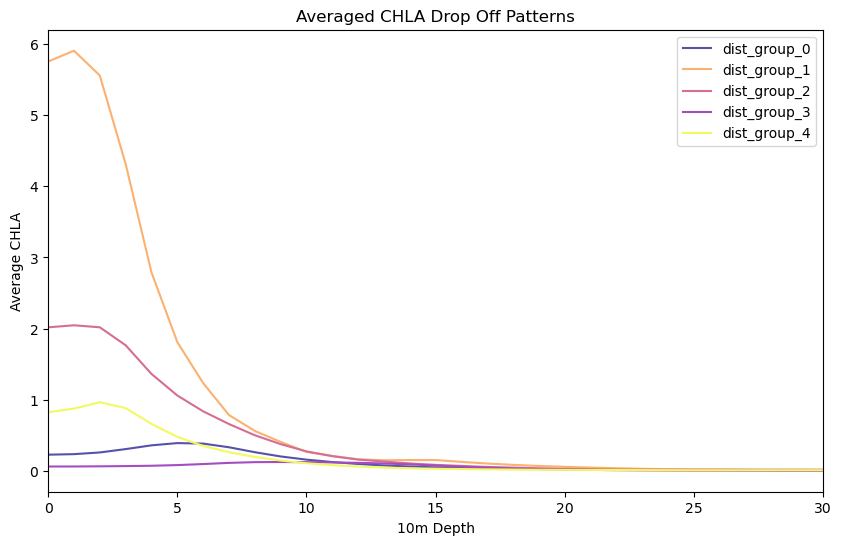

In [293]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=dist_groupings, palette=['#5552AA', '#FAB171', '#D66D94', '#A44DC1', '#F3F960'], dashes=False).set_title("Averaged CHLA Drop Off Patterns")
ax.set(xlabel='10m Depth', ylabel='Average CHLA', xlim=(0,30))

In [291]:
# lets see if in a given month, the groupings are clustered by location
winter_data = cached_data[cached_data['seasonality'] == 1]
spring_data = cached_data[cached_data['seasonality'] == 2]
summer_data = cached_data[cached_data['seasonality'] == 3]
fall_data = cached_data[cached_data['seasonality'] == 4]



KeyError: 'seasonality'

In [ ]:
winter_data

depth_bin,float,cycleNumber,seasonality,latitude,longitude,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,dist_group
17433,2902210,240,1.0,18.84500,67.00500,0.26280,0.262800,0.262800,0.263000,0.266800,...,5.400000e-02,5.400000e-02,5.400000e-02,0.054000,0.054000,0.054000,0.054000,0.054000,0.054000,3
17434,2902210,241,1.0,19.07400,67.14800,0.30000,0.394114,0.540200,0.609200,0.573200,...,5.160000e-02,5.160000e-02,5.160000e-02,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,3
17437,2902210,243,1.0,19.87700,67.20000,0.28800,0.337886,0.483600,0.543457,0.462465,...,5.400000e-02,5.400000e-02,5.400000e-02,0.054000,0.054000,0.054000,0.054000,0.054000,0.054000,3
17438,2902210,244,1.0,20.02500,67.14300,0.45864,0.487600,0.489600,0.461160,0.363000,...,5.760000e-02,5.760000e-02,5.760000e-02,0.057600,0.057600,0.057600,0.057600,0.057600,0.057600,3
17439,2902210,245,1.0,19.99300,67.17800,0.54600,0.551143,0.556629,0.453800,0.315225,...,5.760000e-02,5.760000e-02,5.760000e-02,0.057600,0.057600,0.057600,0.057600,0.057600,0.057600,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330454,7900585,82,1.0,49.93506,-38.99941,0.14965,0.149650,0.149650,0.149650,0.149650,...,3.833388e-03,3.868775e-03,3.485547e-03,0.003288,0.003591,0.003493,0.003304,0.003461,0.003461,2
330455,7900585,83,1.0,50.04671,-38.43704,0.13505,0.135050,0.135050,0.135095,0.136078,...,7.627859e-03,7.352458e-03,7.267645e-03,0.006976,0.007028,0.006966,0.006700,0.006827,0.007053,2
330456,7900585,84,1.0,50.17642,-38.37209,0.18615,0.186150,0.186150,0.186150,0.186150,...,-3.135994e-03,-4.091031e-03,-3.367403e-03,-0.001692,-0.000379,-0.000375,-0.000693,-0.000334,-0.000500,2
330467,7900585,89,1.0,49.78856,-38.77827,0.22995,0.229950,0.229950,0.229950,0.229950,...,-1.331391e-03,-4.044670e-05,-3.837799e-04,-0.000603,-0.000607,-0.000598,-0.000262,-0.000161,-0.000430,3


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

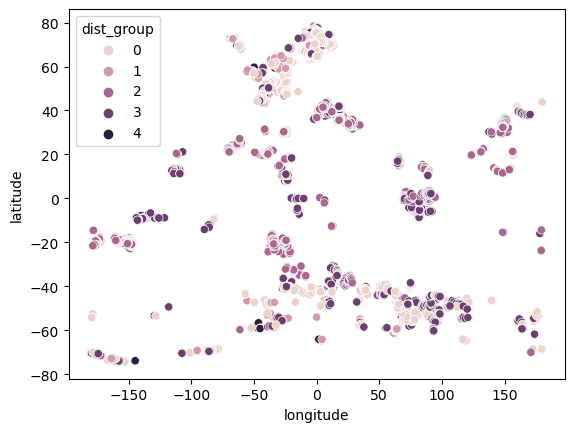

In [ ]:
# sns.scatterplot(data=summer_data, x='longitude', y='latitude', hue='dist_group')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

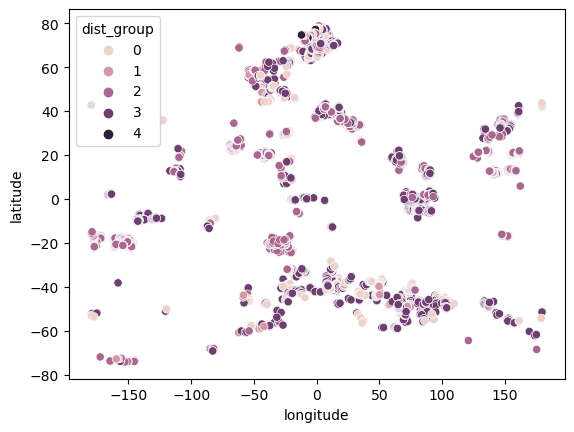

In [ ]:
# sns.scatterplot(data=spring_data, x='longitude', y='latitude', hue='dist_group')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

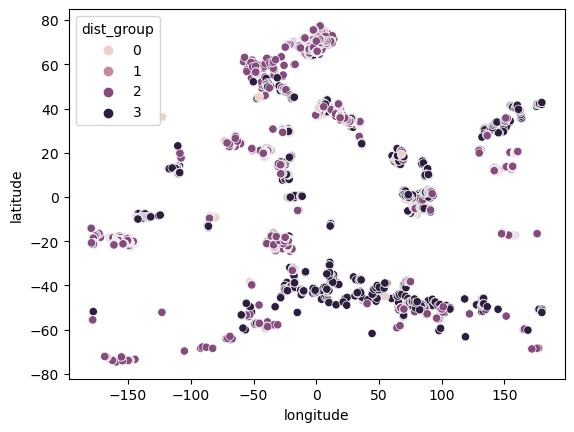

In [ ]:
# sns.scatterplot(data=winter_data, x='longitude', y='latitude', hue='dist_group')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

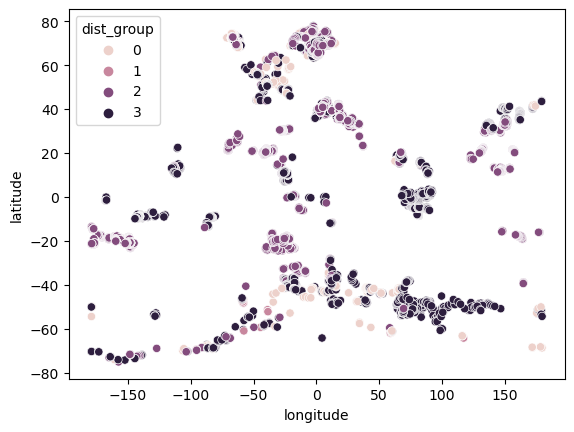

In [ ]:
# sns.scatterplot(data=fall_data, x='longitude', y='latitude', hue='dist_group')

In [ ]:
def plot_on_map(df, source, features=None, data_type=None, figsize=(10,4), subtitle=None):
    '''
    function to plot latitude and longitude of (float or satellite) data over the world map, colored by zero or more features
    
    arguments
    ---------
    df (pandas df):
        dataframe, already filtered as desired
    source (str):
            satellite, float, or a matchup; used in the plot titles
    features (str or list-like or None):
              string of a single feature, or list of strings of features corresponding to column names of df;
              there will be a different plot for every feature;
              if features is None, just latitude and longitude will be plotted with no coloring by feature;
              list of features may include None
    data_type (str or list-like or None):
               single or list containing 'continuous', 'discrete' or 'categorical', or None to determine use of colorbar, legend, or no color respectively ;
               if a single value, then it is assumed to be applied to all features;
               if a list, then it it must have the same length as the list of features
    figsize (tuple):
             figsize argument passed to plt.figure()
    subtitle (str or None):
              optional additional line to add to the title; a single string that will be applied to all plots
    '''
    
    # argument modifications
    if type(features) == str:
        features = [features]
        
    if features is None:
        features = [None]
        
    if data_type == 'discrete':
        data_type = 'categorical'
    
    if type(data_type) == list:
        data_type = ['categorical' if t=='discrete' else t for t in data_type]
        
    if type(data_type) == list and len(features) != len(data_type):
        print('Error — len(features) and len(data_type) should be equal')
        return
    
    if subtitle is not None and subtitle.strip() == '':
        subtitle = None
        
    # obtain map
    land = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    
    for f in features:
        
        # plot the base map
        land.plot(color='lightgray', figsize=figsize)
        
        # scatter plot with no color if feature is None
        if f is None:
            plt.scatter(df['longitude'], df['latitude'], s=3, alpha=0.7)
            if subtitle is None:
                plt.title(f'Latitude vs. Longitude for {source.title()} Data', fontsize='x-large')
            else:
                plt.title(f'Latitude vs. Longitude for {source.title()} Data\n({subtitle})', fontsize='x-large')
            
        else:
            f_df = df[df[f].notna()].reset_index(drop=True)

            # scatter plot, colored by continuous feature
            if data_type == 'continuous' or (type(data_type) == list and data_type[features.index(f)] == 'continuous'):
                plt.scatter(f_df['longitude'], f_df['latitude'], c=f_df[f], cmap='plasma', s=3, alpha=0.7)
                plt.colorbar(label=f)

            # scatter plot, colored by categorical feature
            elif data_type == 'categorical' or (type(data_type) == list and data_type[features.index(f)] == 'categorical'):
                colors =  [list(np.unique(f_df[f])).index(v) for v in f_df[f]]
                color_indices = np.unique(colors, return_index=True)[1]
                labels = [f_df.loc[i,f] for i in sorted(color_indices)]
                scatter = plt.scatter(f_df['longitude'], f_df['latitude'], c=colors, cmap='plasma', s=3, alpha=0.7)
                plt.legend(handles=scatter.legend_elements()[0], labels=labels, title=f, loc='upper left', bbox_to_anchor=(1,1))

            if subtitle is None:
                plt.title(f'{source.title()} Data Latitude vs. Longitude\nColored by {f}', fontsize='x-large')
            else:
                plt.title(f'{source.title()} Data Latitude vs. Longitude\nColored by {f}\n({subtitle})', fontsize='x-large')
            
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        
        # display plot
        plt.show()

In [ ]:
summer_data = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/ocean-depth-characterization/EDA/summer_data.csv')

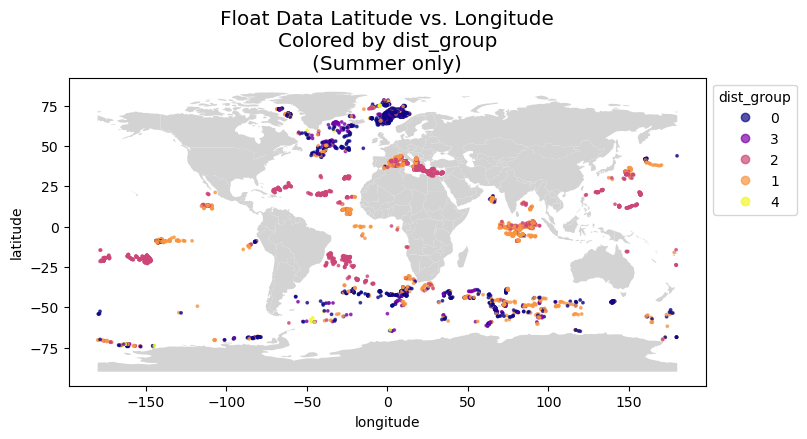

In [ ]:
plot_on_map(
    df=summer_data,
    features='dist_group',
    data_type='categorical',
    source='float',
    subtitle='Summer only'
)